In [27]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
from datetime import datetime

file_path = '/content/drive/MyDrive/EDA task/data1 - Sheet1.csv'
df = pd.read_csv(file_path)

print("Before Data Cleaning:")
print(df.head())

df.replace({'-1': np.nan, -1: np.nan}, inplace=True)

df['DOJ'] = pd.to_datetime(df['DOJ'])
df['DOL'] = pd.to_datetime(df['DOL'], errors='coerce')
df['DOB'] = pd.to_datetime(df['DOB'])

today = datetime.today().date()
df['DOL'] = df['DOL'].fillna(today)

df.drop_duplicates(inplace=True)

salary_q1 = df['Salary'].quantile(0.25)
salary_q3 = df['Salary'].quantile(0.75)
salary_iqr = salary_q3 - salary_q1
salary_upper_bound = salary_q3 + 1.5 * salary_iqr
df['Salary'] = df['Salary'].apply(lambda x: min(x, salary_upper_bound))

print("\nAfter Data Cleaning:")
print(df.head())

cleaned_file_path = '/content/drive/MyDrive/EDA task/cleaned_data.csv'
df.to_csv(cleaned_file_path, index=False)


Before Data Cleaning:
         ID     Salary          DOJ          DOL               Designation  \
0  203097.0   420000.0  6/1/12 0:00      present   senior quality engineer   
1  579905.0   500000.0  9/1/13 0:00      present         assistant manager   
2  810601.0   325000.0  6/1/14 0:00      present          systems engineer   
3  267447.0  1100000.0  7/1/11 0:00      present  senior software engineer   
4  343523.0   200000.0  3/1/14 0:00  3/1/15 0:00                       get   

     JobCity Gender           DOB  10percentage  \
0  Bangalore      f  2/19/90 0:00          84.3   
1     Indore      m  10/4/89 0:00          85.4   
2    Chennai      f   8/3/92 0:00          85.0   
3    Gurgaon      m  12/5/89 0:00          85.6   
4    Manesar      m  2/27/91 0:00          78.0   

                          10board  ...  ComputerScience  MechanicalEngg  \
0  board ofsecondary education,ap  ...             -1.0            -1.0   
1                            cbse  ...             -

In [32]:
numeric_cols = df.select_dtypes(include=['number']).columns
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).sum()
print("Outliers in each numerical column:")
print(outliers)


Outliers in each numerical column:
ID                         0
Salary                     0
10percentage              30
12graduation              45
12percentage               1
CollegeID                  0
CollegeTier              297
collegeGPA                38
CollegeCityID              0
CollegeCityTier            0
GraduationYear             2
English                   15
Logical                   18
Quant                     25
Domain                     0
ComputerProgramming       45
ElectronicsAndSemicon     21
ComputerScience            4
MechanicalEngg            13
ElectricalEngg             0
TelecomEngg                0
CivilEngg                  0
conscientiousness         39
agreeableness            123
extraversion              40
nueroticism               15
openess_to_experience     95
dtype: int64


Summary statistics of numerical columns:
                 ID         Salary  10percentage  12graduation  12percentage  \
count  3.998000e+03    3999.000000   3998.000000   3998.000000   3998.000000   
mean   6.637945e+05  295493.040573     77.925443   2008.087544     74.466366   
std    3.632182e+05  138502.441539      9.850162      1.653599     10.999933   
min    1.124400e+04   35000.000000     43.000000   1995.000000     40.000000   
25%    3.342842e+05  180000.000000     71.680000   2007.000000     66.000000   
50%    6.396000e+05  300000.000000     79.150000   2008.000000     74.400000   
75%    9.904800e+05  370000.000000     85.670000   2009.000000     82.600000   
max    1.298275e+06  655000.000000     97.760000   2013.000000     98.700000   

          CollegeID  CollegeTier   collegeGPA  CollegeCityID  CollegeCityTier  \
count   3998.000000  3998.000000  3998.000000    3998.000000      3998.000000   
mean    5156.851426     1.925713    71.486171    5156.851426         0.30040

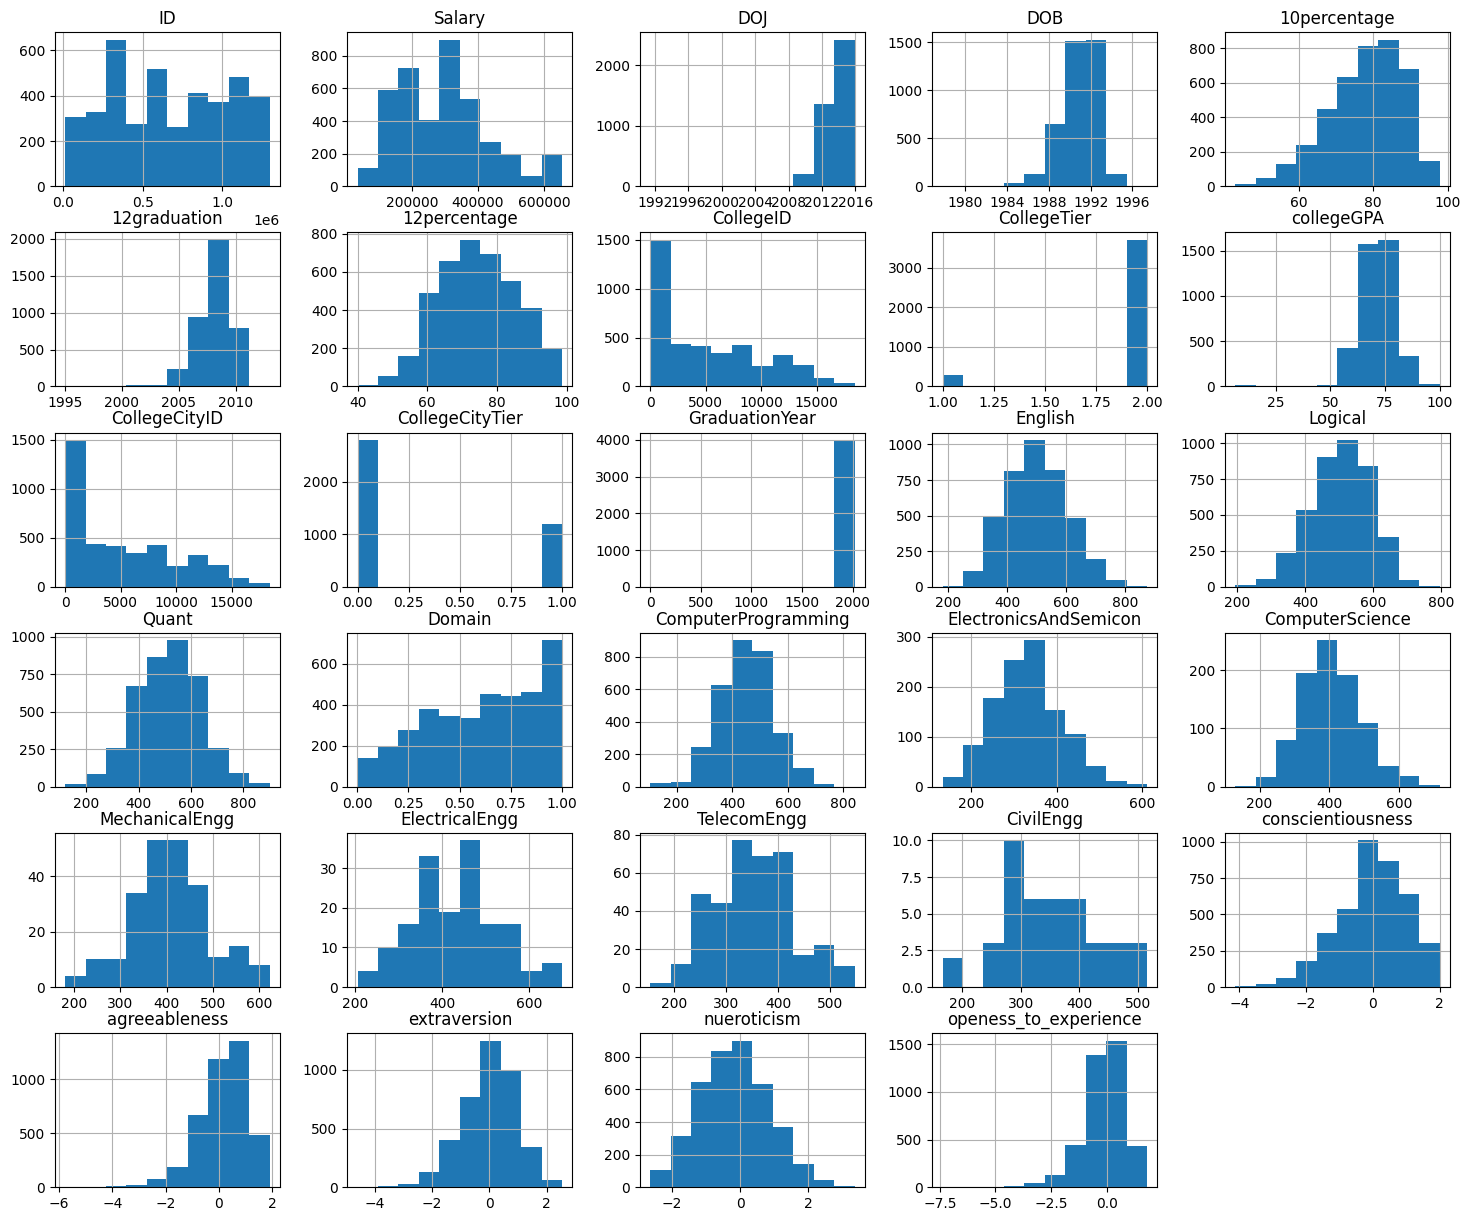

In [64]:
summary_stats = df.describe()
print("Summary statistics of numerical columns:")
print(summary_stats)

import matplotlib.pyplot as plt
df.hist(figsize=(18, 15))
plt.show()


In [34]:
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Frequency distribution of {col}:")
    print(df[col].value_counts())
    print()

Frequency distribution of DOL:
2024-02-22             1877
2015-04-01 00:00:00     573
2015-03-01 00:00:00     124
2015-05-01 00:00:00     112
2015-01-01 00:00:00      99
                       ... 
2005-03-01 00:00:00       1
2015-10-01 00:00:00       1
2010-02-01 00:00:00       1
2011-02-01 00:00:00       1
2010-10-01 00:00:00       1
Name: DOL, Length: 67, dtype: int64

Frequency distribution of Designation:
software engineer                    539
software developer                   265
system engineer                      205
programmer analyst                   139
systems engineer                     118
                                    ... 
cad drafter                            1
noc engineer                           1
human resources intern                 1
senior quality assurance engineer      1
jr. software developer                 1
Name: Designation, Length: 419, dtype: int64

Frequency distribution of JobCity:
Bangalore           627
Noida               368
Hyder

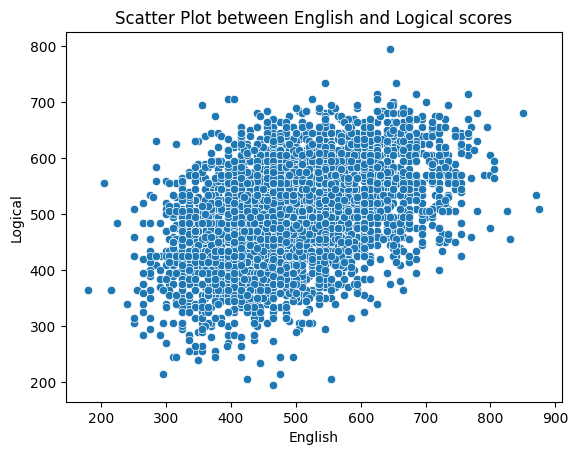

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='English', y='Logical', data=df)
plt.title('Scatter Plot between English and Logical scores')
plt.show()


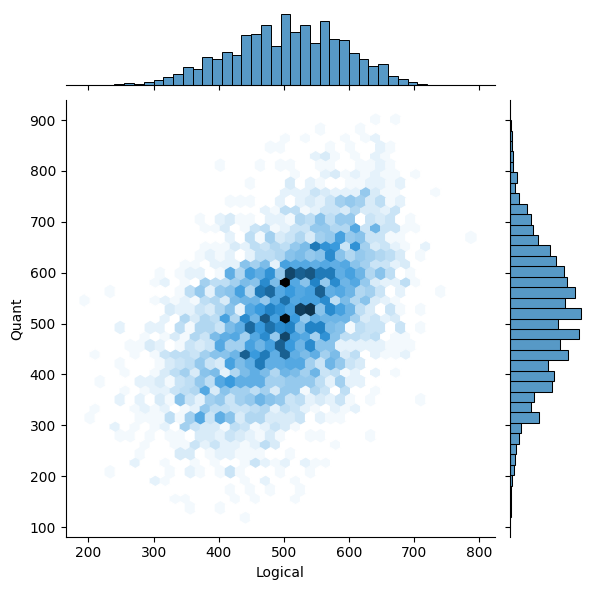

In [36]:
sns.jointplot(x='Logical', y='Quant', kind='hex', data=df)
plt.show()


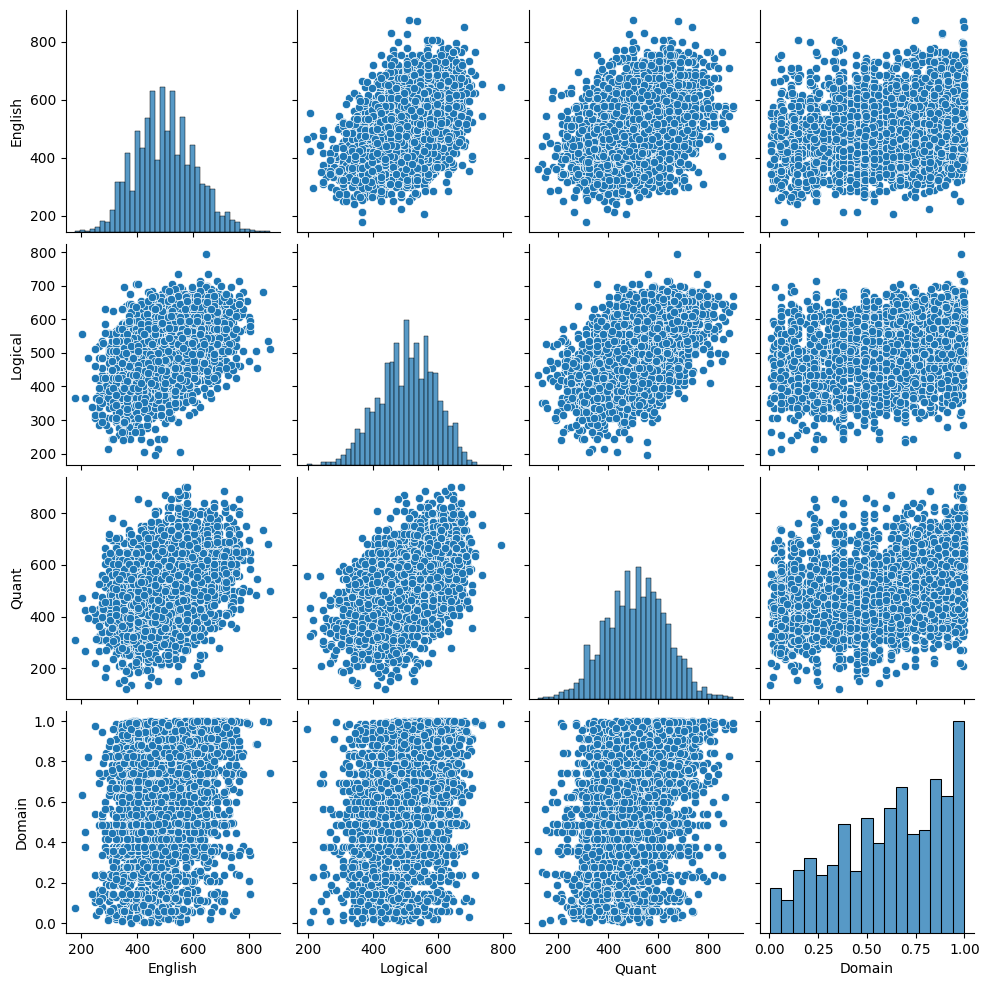

In [37]:
sns.pairplot(df[['English', 'Logical', 'Quant', 'Domain']])
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 94.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 37.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 87.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 83.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 90.1% of the points cannot be plac

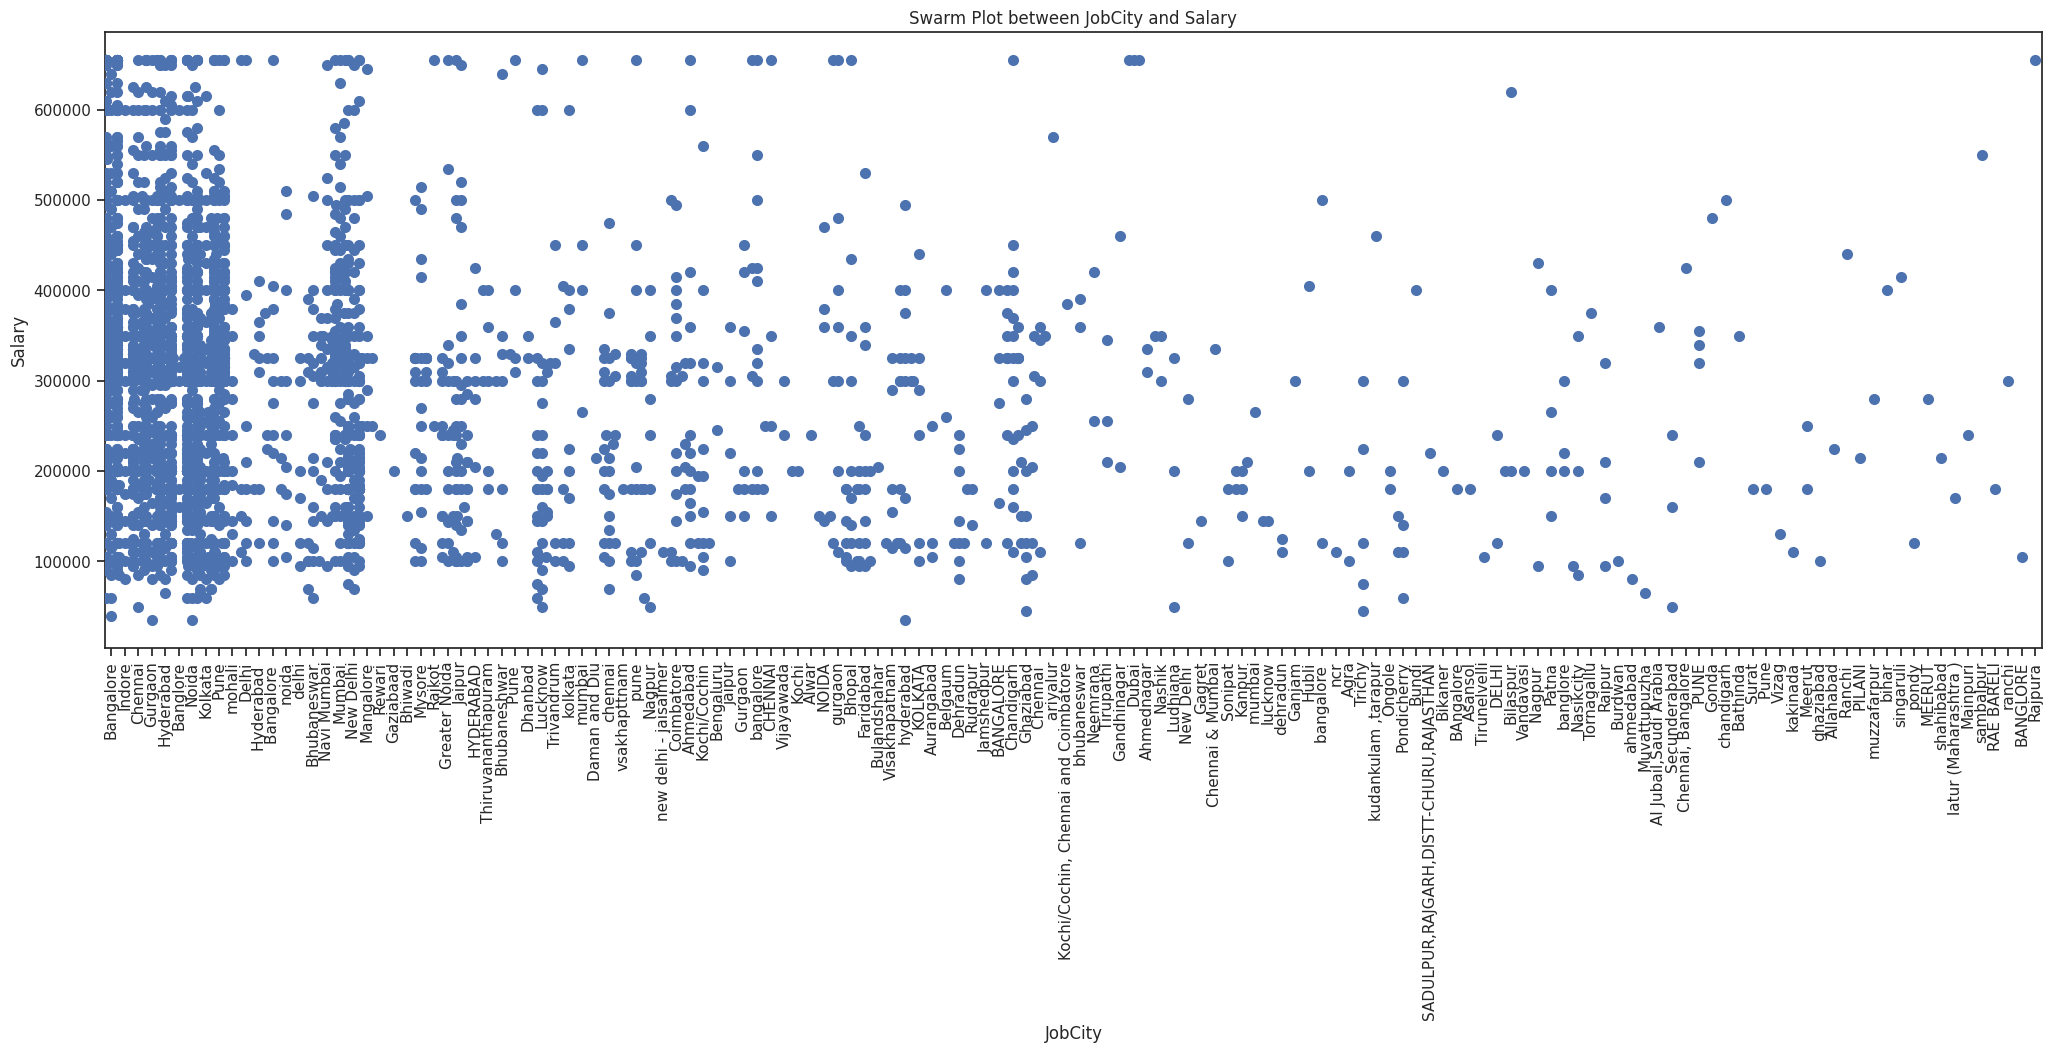

In [67]:
sampled_job_cities = df['JobCity'].sample(n=1000, random_state=42)

sampled_df = df[df['JobCity'].isin(sampled_job_cities)]

plt.figure(figsize=(25, 8))
sns.swarmplot(x='JobCity', y='Salary', data=sampled_df, size=8)
plt.title('Swarm Plot between JobCity and Salary')
plt.xticks(rotation=90)
plt.show()


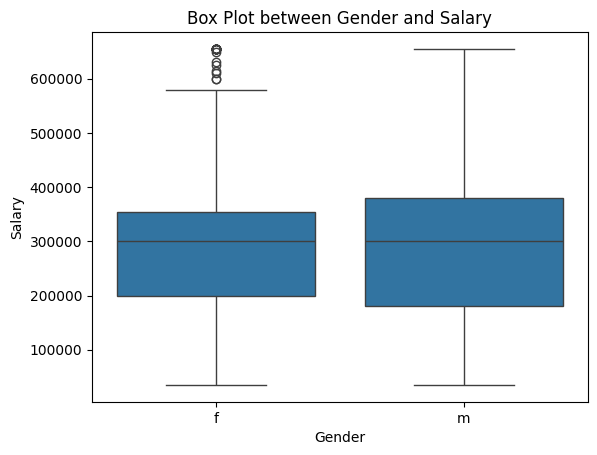

In [52]:
sns.boxplot(x='Gender', y='Salary', data=df)
plt.title('Box Plot between Gender and Salary')
plt.show()


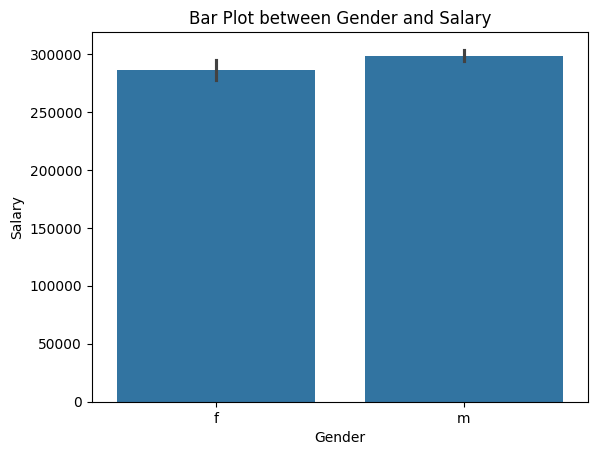

In [53]:
sns.barplot(x='Gender', y='Salary', data=df)
plt.title('Bar Plot between Gender and Salary')
plt.show()


<Figure size 800x600 with 0 Axes>

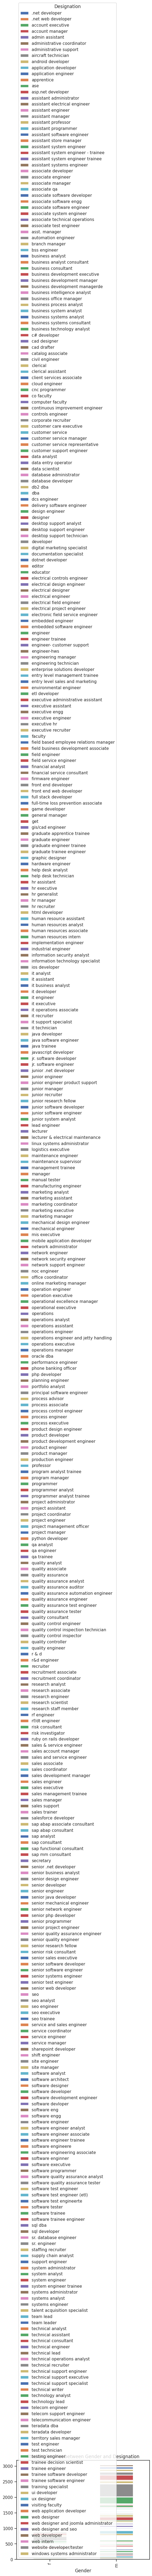

In [73]:
cross_tab = pd.crosstab(df['Gender'], df['Designation'])

plt.figure(figsize=(8, 6))
cross_tab.plot(kind='bar', stacked=True)

plt.title('Stacked Bar Plot between Gender and Designation')

plt.show()


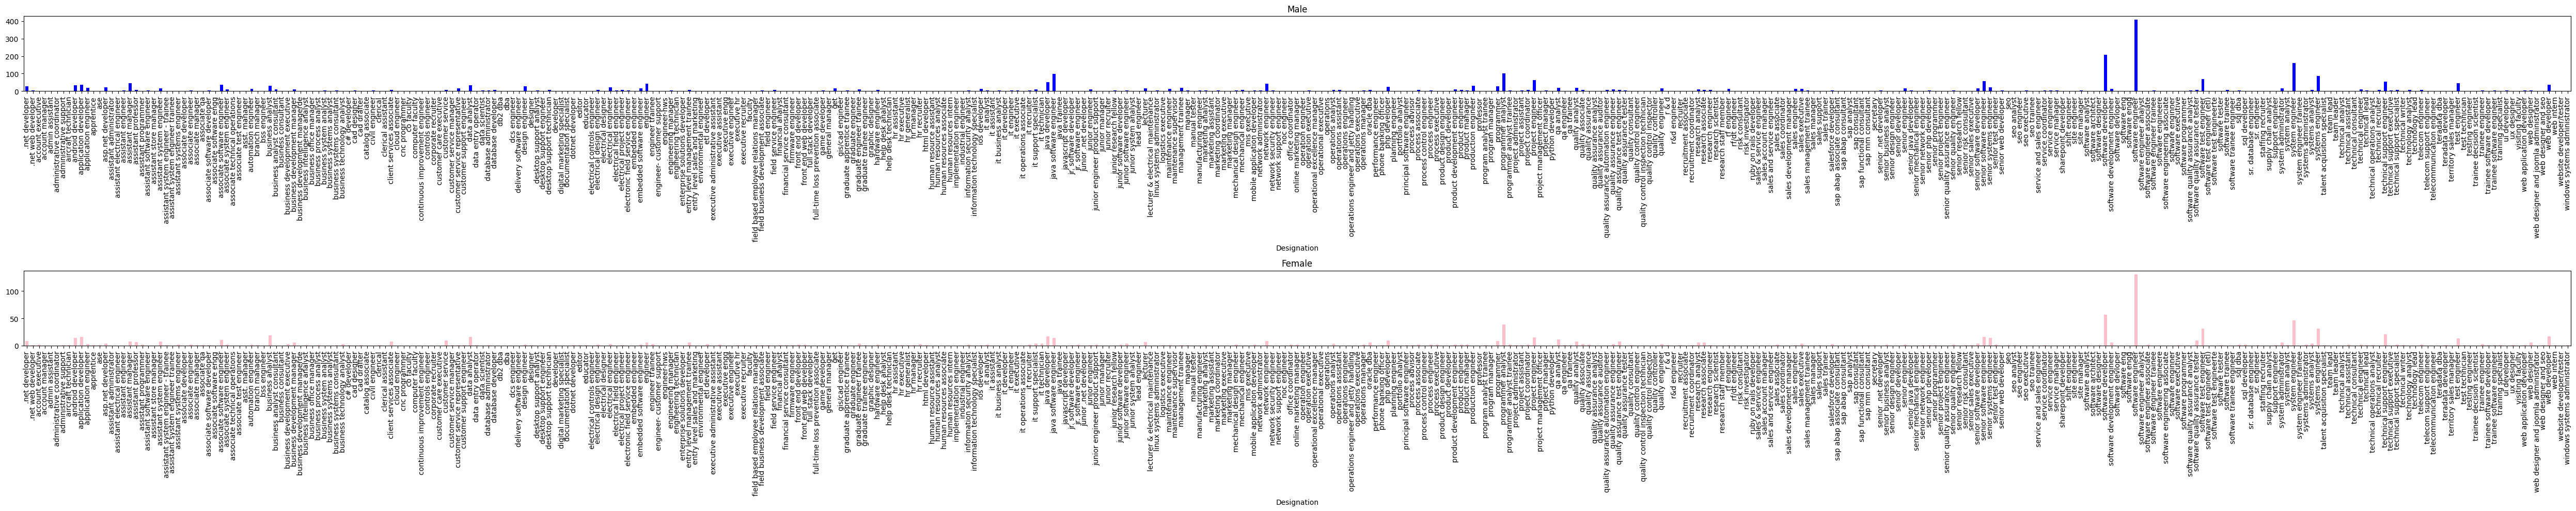

In [60]:
cross_tab = pd.crosstab(df['Gender'], df['Designation'])

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(50, 10))

cross_tab.loc['m'].plot(kind='bar', stacked=True, ax=axes[0], color='blue')
axes[0].set_title('Male')

cross_tab.loc['f'].plot(kind='bar', stacked=True, ax=axes[1], color='pink')
axes[1].set_title('Female')

plt.tight_layout()
plt.show()


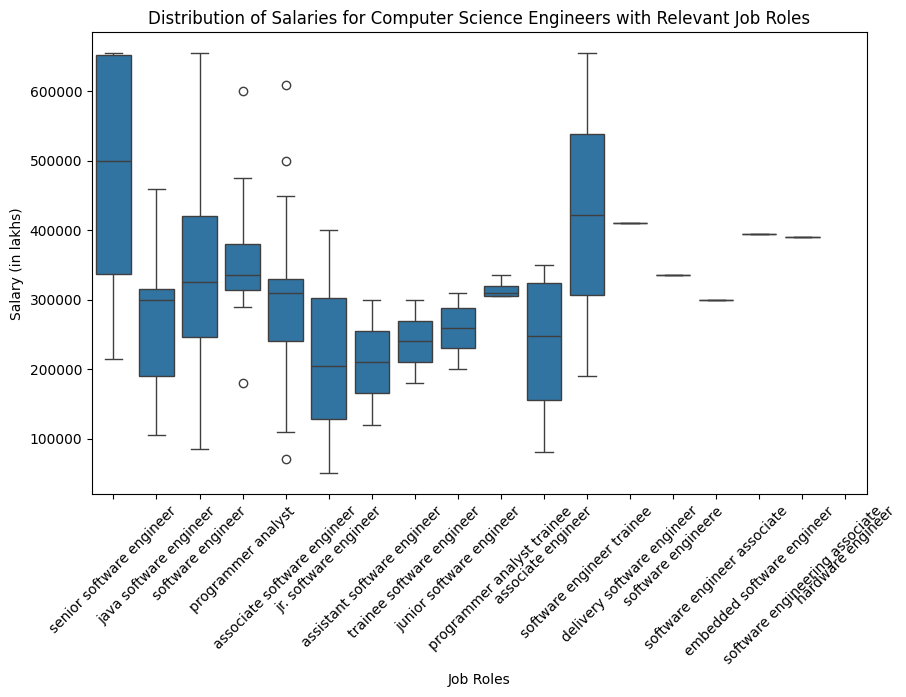

In [12]:
df = pd.read_csv('/content/drive/MyDrive/EDA task/cleaned_data.csv')

computer_science_engineering_variations = ['computer engineering', 'computer science & engineering', 'computer application',
                                           'computer science and technology', 'computer and communication engineering',
                                           'computer networking', 'computer science']

relevant_job_roles = ['senior software engineer', 'java software engineer', 'software engineer', 'programmer analyst',
                      'associate software engineer', 'jr. software engineer', 'assistant software engineer',
                      'trainee software engineer', 'junior software engineer', 'programmer analyst trainee',
                      'associate engineer', 'software engineer trainee', 'delivery software engineer',
                      'software engineere', 'software engineer associate', 'embedded software engineer',
                      'software engineering associate', 'hardware engineer']

cs_engineers = df[(df['Specialization'].str.lower().isin(computer_science_engineering_variations)) &
                  (df['Designation'].str.lower().isin(relevant_job_roles))]

plt.figure(figsize=(10, 6))
sns.boxplot(x='Designation', y='Salary', data=cs_engineers, order=relevant_job_roles)
plt.title('Distribution of Salaries for Computer Science Engineers with Relevant Job Roles')
plt.xlabel('Job Roles')
plt.ylabel('Salary (in lakhs)')
plt.xticks(rotation=45)
plt.show()


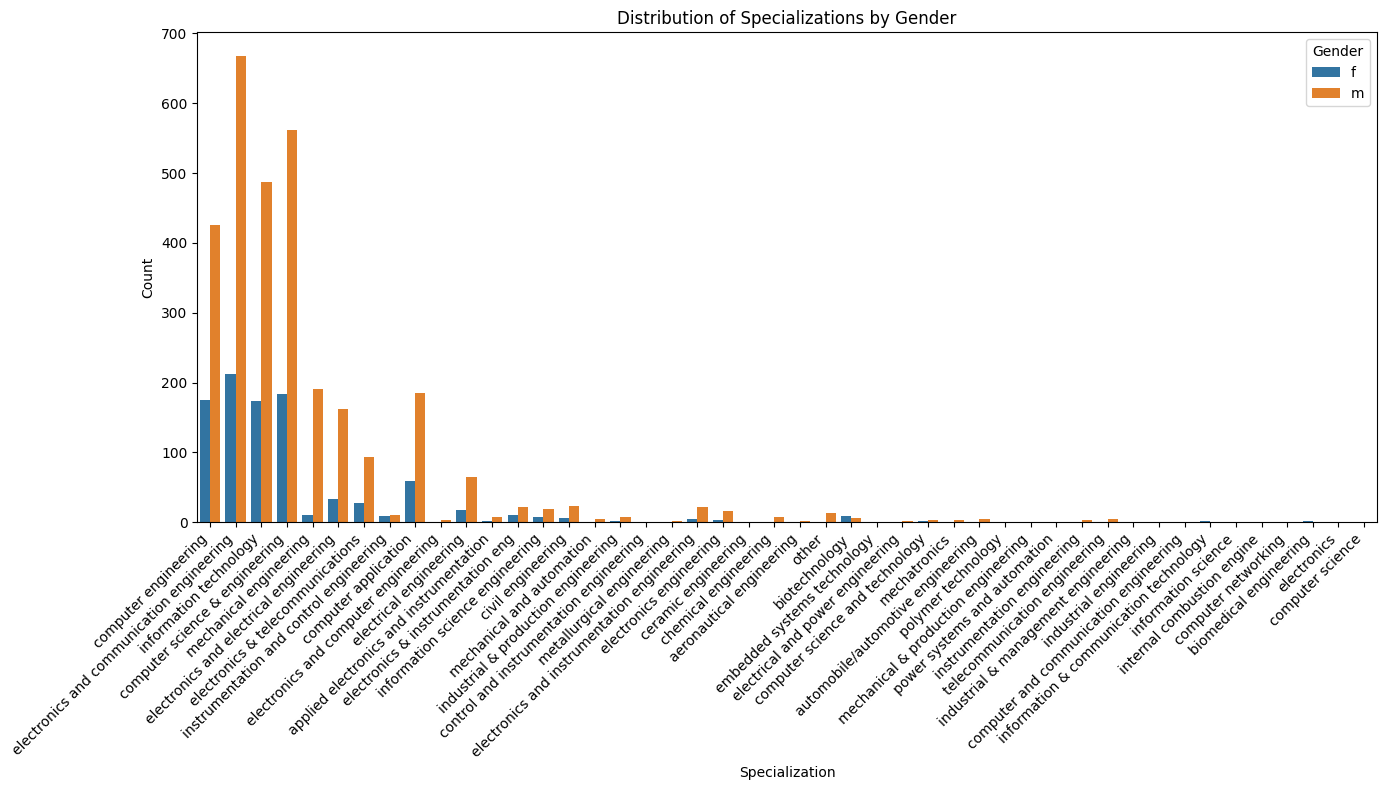

In [17]:
plt.figure(figsize=(14, 8))

sns.countplot(x='Specialization', hue='Gender', data=df)
plt.title('Distribution of Specializations by Gender')
plt.xlabel('Specialization')
plt.ylabel('Count')

plt.xticks(rotation=45, ha='right')

plt.legend(title='Gender', loc='upper right')

plt.tight_layout()
plt.show()
